<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/homeworks/hw_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# MAT281 - Tarea N°02


## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Héctor Silva

* __Rol__: 201811569-k

2.- Debes _subir_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
   - Soluciones
   - Código
   - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.
   
4.- Esta Tarea debe ser entregada en **Dos Jupyter Notebooks Distinto**.
   * **Ejemplo**: `hw_02_part_01.ipynb`, `hw_02_part_02.ipynb`.

## II.- Titanic - Machine Learning from Disaster

<img src="https://i.pinimg.com/originals/8c/ef/e7/8cefe799c4d5d2ad4ad7f6524d3838f4.png" width = "400" align="center"/>


El desafío **Titanic - Machine Learning from Disaster** en [Kaggle](https://www.kaggle.com/competitions/titanic/overview/description) invita a predecir qué pasajeros sobrevivieron al naufragio del Titanic mediante un modelo de machine learning. Utiliza datos reales de los pasajeros, como su nombre, edad, género y clase socioeconómica, para explorar patrones de supervivencia y construir un modelo predictivo. Este es uno de los desafíos más populares de Kaggle y un excelente punto de partida para aprender sobre machine learning y análisis de datos.

### Pasos para participar:

1. **Unirse a la competencia**:
   - [Crea una cuenta o inicia sesión en Kaggle](https://www.kaggle.com/account/login?returnUrl=%2Fc%2Ftitanic) y acepta las reglas para acceder a los datos de la competencia.
   
2. **Descargar y explorar los datos**:
   - Descarga los archivos `train.csv` y `test.csv` desde la [página de datos](https://www.kaggle.com/competitions/titanic/data).
   - `train.csv` contiene información de 891 pasajeros, incluyendo si sobrevivieron o no (columna `Survived`). En `test.csv`, se oculta esta columna para que tu modelo prediga la supervivencia de 418 pasajeros adicionales.

3. **Desarrollar el modelo**:
   - Usa `train.csv` para explorar y descubrir patrones, luego entrena un modelo de machine learning que pueda predecir la supervivencia en `test.csv`. Un recurso útil para aprender es el [tutorial de Alexis Cook](https://www.kaggle.com/alexisbcook/titanic-tutorial), que explica paso a paso cómo hacer tu primera predicción.
   - Puedes explorar notebooks de otros participantes para inspiración y técnicas avanzadas en la [sección de notebooks](https://www.kaggle.com/c/titanic/notebooks).

4. **Realizar una predicción y enviar tu archivo**:
   - El archivo CSV de predicciones debe tener dos columnas: `PassengerId` y `Survived`. Puedes consultar un ejemplo en el archivo `gender_submission.csv` disponible en la [página de datos](https://www.kaggle.com/competitions/titanic/data).
   - Sube tu archivo en la sección de envíos y revisa tu puntaje de precisión, que mide el porcentaje de pasajeros que tu modelo predijo correctamente.

5. **Revisar el leaderboard y mejorar el modelo**:
   - Ve tu posición en el [leaderboard](https://www.kaggle.com/c/titanic/leaderboard) y mejora tu modelo basándote en ideas de los foros o pruebas adicionales.

### Ayuda y recursos adicionales:

- [Foro de discusión del Titanic](https://www.kaggle.com/c/titanic/discussion): Un espacio donde puedes hacer preguntas y ver consejos de otros participantes.
- [Vídeo sobre la jerga de Kaggle](https://www.youtube.com/watch?v=sEJHyuWKd-s) por Dr. Rachael Tatman, para entender mejor los términos comunes en Kaggle.
- [Notebooks de la competencia](https://www.kaggle.com/c/titanic/notebooks): Revisa notebooks compartidos para ver cómo otros abordan el desafío.

Este desafío es ideal para principiantes en machine learning y permite practicar desde la limpieza de datos hasta el desarrollo y evaluación de modelos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Configurar estilo de gráficos de seaborn
#sns.set_theme(style="whitegrid")

from google.colab import drive
drive.mount('/content/drive')

# Cargar archivos
train= pd.read_csv('/content/drive/MyDrive/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data/test.csv')

#explorar
print(train.head())
print(train.info())
print(train.describe())


Mounted at /content/drive
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   

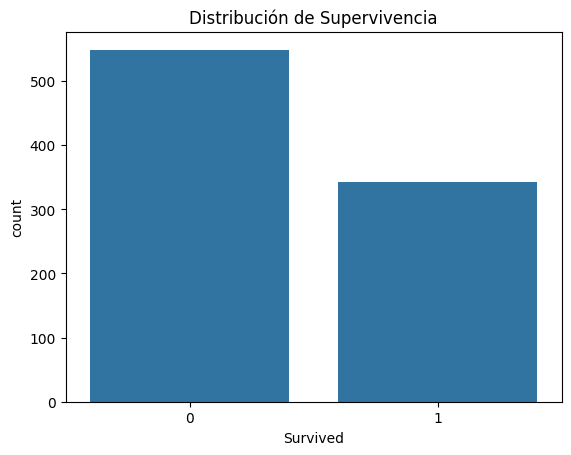

In [2]:
# Visualización de supervivencia
import seaborn as sns
sns.countplot(data=train, x='Survived')
plt.title("Distribución de Supervivencia")
plt.show()

Claramente la cantidad sobrevivientes es menor

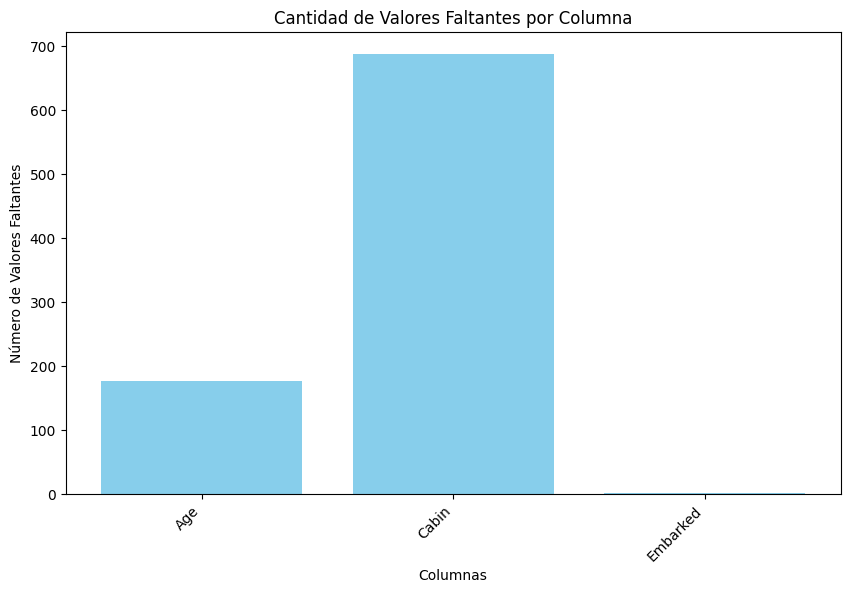

In [5]:
# Ver datos faltantes

missing_values = train.isnull().sum()
missing_percentage = (missing_values / len(train)) * 100

# Crear un DataFrame para almacenar la información
missing_data = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje (%)': missing_percentage
})

# Filtrar columnas con valores faltantes
missing_data = missing_data[missing_data['Valores Faltantes'] > 0]

# Visualizar los datos faltantes con un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(missing_data.index, missing_data['Valores Faltantes'], color='skyblue')
plt.title('Cantidad de Valores Faltantes por Columna')
plt.ylabel('Número de Valores Faltantes')
plt.xlabel('Columnas')
plt.xticks(rotation=45, ha='right')
plt.show()


Del gráfico se puede decir que cabin al tener tantos valores faltantes no es tan util para realizar un modelo en cambio age solo le falta aproximadamente un 20%a de los datos, y a embarked solo le faltan 2 datos por lo que se puede rellenar.


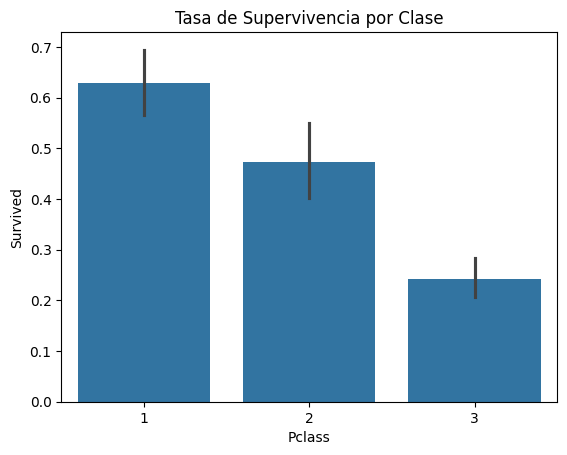

In [6]:
# Relación entre clase y supervivencia
sns.barplot(data=train, x='Pclass', y='Survived')
plt.title("Tasa de Supervivencia por Clase")
plt.show()

se observa que a mayor clase (1) mayor es la cantidad de sobrevivientes

In [7]:
# procesamiento de datos
# reemplazar variables faltantes con la mediana en las columnas age y fare. se omitira la columna Cabin ya que son muchos datos faltantes
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
# reemplazar variables faltantes con la moda en embarked ya que no es una variable numerica
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Convertir variables a numéricas
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)

# Seleccionar columnas de entrenamiento
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = train[features]
y = train['Survived']
X_test = test[features]

<ipython-input-7-30cb217cf97f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
<ipython-input-7-30cb217cf97f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [8]:
# Entrenar  modelo
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42) #se utilizara randomforest
model.fit(X_train, y_train)

# Validar el modelo
y_pred = model.predict(X_val)
print(f"Accuracy en validación: {accuracy_score(y_val, y_pred):.2f}")

Accuracy en validación: 0.82


In [10]:
#Predicciones finales
predictions = model.predict(X_test)

In [11]:
#GUARDAR
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})
output.to_csv('submission.csv', index=False)


archivo fue subido a la seccion de envios obteniendo el siguiente resultado:
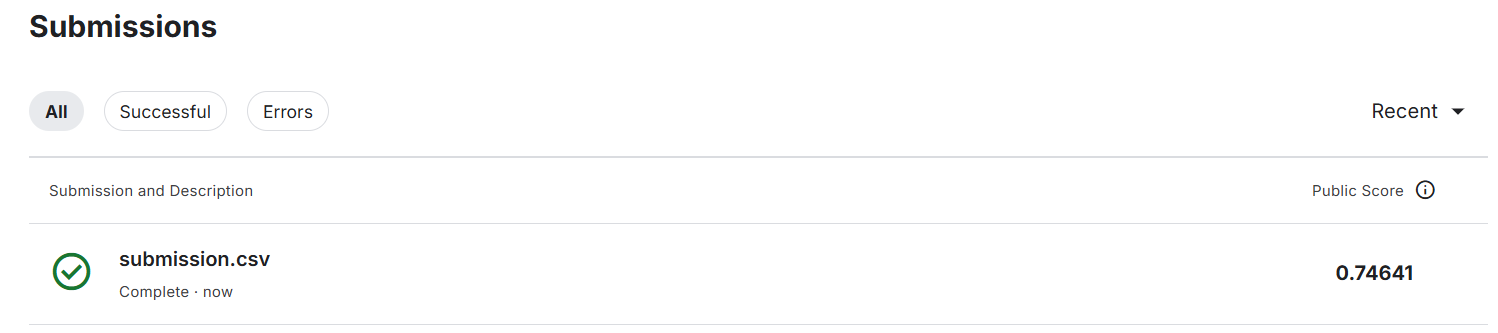

# MEJORAR MODELO



el usuario Zafar Ali khan tambien utiliza random forest pero utilizando otros parametros , se probará

In [15]:
# Entrenar  modelo
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
RandomForestClassifier(n_estimators=70, max_depth=4, random_state=43)

model.fit(X_train, y_train)

# Validar el modelo
y_pred = model.predict(X_val)
print(f"Accuracy en validación: {accuracy_score(y_val, y_pred):.2f}")

#Predicciones finales
predictions2 = model.predict(X_test)

#GUARDAR
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions2})
output.to_csv('submission2.csv', index=False)

Accuracy en validación: 0.82


esta modificacion no cambia el Score

A continuación se implementará el codigo creado por el usuario ZLATANKREMONIC el cual crea funciones para analizar de mejor manera las calumnas importantes al momento de realizar la prediccion. En el siguiente codigo se explicara cada una de las funciones.

In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Función para procesar nombres (creacion de dos columnas, longitud de nombre de pasajero y una con el nombre)
def names(train, test):
    for i in [train, test]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test

# Función donde valores vacios de age son rellenados con valor promedio de la clase del pasajero (a diferencia de mi codigo en donde se utiliza media de todos los pasajeros)
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

# Funcion para agrupar tamaños de familias en diferentes categorias
def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp'] + i['Parch']) == 0, 'Solo',
                                 np.where((i['SibSp'] + i['Parch']) <= 3, 'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test

# Función para procesar tickets creando dos columnas agrupando valores de menor frecuencia segun la tasa de supervivencia
def ticket_grouped(train, test):
    for i in [train, test]:
        i['Ticket_Lett'] = i['Ticket'].apply(lambda x: str(x)[0])
        i['Ticket_Lett'] = np.where((i['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), i['Ticket_Lett'],
                                    np.where((i['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                             'Low_ticket', 'Other_ticket'))
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test

# Funciones para procesar cabinas
def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test

def cabin_num(train, test):
    for i in [train, test]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_num1'] = i['Cabin_num1'].replace('an', np.NaN)
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(train['Cabin_num1'], 3)
    train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix='Cabin_num')), axis=1)
    test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix='Cabin_num')), axis=1)
    del train['Cabin_num']
    del test['Cabin_num']
    del train['Cabin_num1']
    del test['Cabin_num1']
    return train, test

# Función para rellenar vacios con valor mas comun (lo mismo de mi codigo)
def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test

# Autor utiliza scikit-learn, convierta las columnas no numericas en variables ¨Dummy¨:
def dummies(train, test, columns=['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column + '_' + i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix=column)[good_cols]), axis=1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix=column)[good_cols]), axis=1)
        del train[column]
        del test[column]
    return train, test

# Cargar datos
train = pd.read_csv('/content/drive/MyDrive/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data/test.csv')

# columnas de entrenamiento
train, test = names(train, test)
train, test = age_impute(train, test)
train, test = cabin_num(train, test)
train, test = cabin(train, test)
train, test = embarked_impute(train, test)
train, test = fam_size(train, test)
test['Fare'] = test['Fare'].fillna(train['Fare'].mean())
train, test = ticket_grouped(train, test)
train, test = dummies(train, test, columns=['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size'])

X_train = train.drop(['Survived'], axis=1)
y_train = train['Survived']
X_test = test[X_train.columns]  # Asegúrate de que solo usamos las columnas que están en X_train

# Modelo Random Forest con los mismos parametros que usa el autor
rf = RandomForestClassifier(criterion='gini',
                            n_estimators=700,
                            min_samples_split=10,
                            min_samples_leaf=1,
                            max_features='sqrt',
                            oob_score=True,
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)
print(f"OOB Score: {rf.oob_score_:.4f}")

# Hacer predicciones
predictions3 = rf.predict(X_test)

# GUARDAR
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions3})
output.to_csv('submission3.csv', index=False)




OOB Score: 0.8339


Nuevamente, el archivo "submission" es subido a Kaggle para obtener el score y se alcanza un valor de 0.78468, aumentando el score que se obtuvo inicialmente.

Comentarios al respecto:

El usuario ZLATANKREMONIC obtiene un score de 82.78%, un valor que es mayor al obtenido, lo cual puede deberse a diferencias en el preprocesamiento de datos y una mejor implementación de las funciones en el modelo. Cabe destacar que las funciones no fueron creadas por mí, sino que fueron extraídas directamente del código realizado por el usuario e implementadas en este notebook.

Se puede concluir que realizar un análisis detallado de cada una de las columnas puede conllevar a obtener una mejor predicción; por ejemplo, agrupar tamaños de familias, analizar parentescos y utilizar el promedio de edad según la categoría del pasajero, etc.